In [83]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [91]:
def create_yin_yang_grid(n_points=50):
    """
    Create a yin-yang grid for global atmospheric modeling.
    
    Args:
        n_points (int): Number of points along each dimension
        
    Returns:
        tuple: Grid coordinates for both Yin and Yang components in lat/lon coordinates
    """
    # # Create parameter space
    # xi = np.linspace(-np.pi*3/2, np.pi*3/2, n_points)
    # eta = np.linspace(-np.pi/4, np.pi/4, n_points)
    # xi_grid, eta_grid = np.meshgrid(xi, eta)
    
    # # Yin component
    # x_yin = np.cos(eta_grid) * np.sin(xi_grid)
    # y_yin = np.sin(eta_grid)
    # z_yin = np.cos(eta_grid) * np.cos(xi_grid)
    
    # # Yang component (rotated)
    # x_yang = np.cos(eta_grid) * np.sin(xi_grid)
    # y_yang = np.cos(eta_grid) * np.cos(xi_grid)
    # z_yang = -np.sin(eta_grid)
    
    # Convert to lat/lon coordinates

    #Yin: Center at (0,0)
    lons_local = np.linspace(-140.,140,n_points*3)
    lats_local = np.linspace(-47.,47.,n_points)
    
    lon_yin, lat_yin = np.meshgrid(lons_local, lats_local)

    #Yang: Rotate 90 degrees, then center at (180,0)
    lon_rad = np.radians(lon_yin)
    lat_rad = np.radians(lat_yin)

    x_yin = np.cos(lat_rad)*np.cos(lon_rad)
    y_yin = np.cos(lat_rad)*np.sin(lon_rad)
    z_yin = np.sin(lat_rad)

    #Convolve to apply 90 degree rotation
    x_yang = x_yin
    y_yang = -z_yin
    z_yang = y_yin

    #Convert back to lat-lon space
    lat_yang = np.degrees(np.arcsin(z_yang))
    lon_yang = np.degrees(np.arctan2(y_yang,x_yang))

    #Shift
    lon_yang = (lon_yang + 180) % 360
        
    return (lon_yin, lat_yin), (lon_yang, lat_yang)


In [89]:
def plot_yin_yang_grid_cartopy(n_points=50, projection=ccrs.Orthographic(0, 30), title="Yin-Yang Grid"):
    """
    Plot the yin-yang grid using Cartopy.
    
    Args:
        n_points (int): Number of points along each dimension
        projection: Cartopy projection instance
    """
    # Create figure
    fig = plt.figure(figsize=(4, 4))
    ax = plt.axes(projection=projection)
    
    # Add map features
    #ax.coastlines(linewidth=0.5)
    #ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    #ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    
    # Generate the grid
    yin, yang = create_yin_yang_grid(n_points)
    lon_yin, lat_yin = yin
    lon_yang, lat_yang = yang
    
    # Plot Yin component grid lines
    #skip = 3
    skip = 1
    for i in range(0, lon_yin.shape[0], skip):
        ax.plot(lon_yin[i, :], lat_yin[i, :], 'k', linewidth=0.5, transform=ccrs.Geodetic())
    
    for j in range(0, lon_yin.shape[1], skip):
        ax.plot(lon_yin[:, j], lat_yin[:, j], 'k', linewidth=0.5, transform=ccrs.Geodetic())
    
    # Plot Yang component grid lines
    for i in range(0, lon_yang.shape[0], skip):
        ax.plot(lon_yang[i, :], lat_yang[i, :], 'gray', linewidth=0.5, transform=ccrs.Geodetic())
    
    for j in range(0, lon_yang.shape[1], skip):
        ax.plot(lon_yang[:, j], lat_yang[:, j], 'gray', linewidth=0.5, transform=ccrs.Geodetic())
    
    plt.title(title)
    
    plt.tight_layout() #For best results
    
    return ax

Generating Yin-Yang atmospheric grid visualizations using Cartopy...


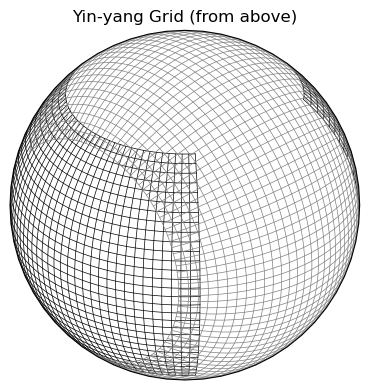

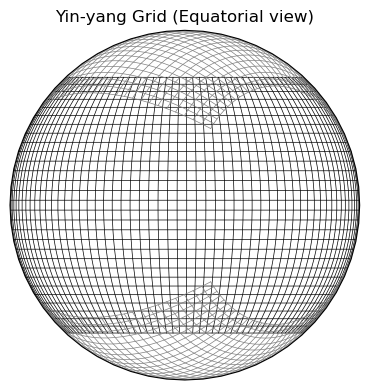

In [92]:
"""Main function to demonstrate different projections of the Yin-Yang grid."""
print("Generating Yin-Yang atmospheric grid visualizations using Cartopy...")

# Orthographic projection (globe view)
ax1 = plot_yin_yang_grid_cartopy(projection=ccrs.Orthographic(135, 30), n_points=30, title='Yin-yang Grid (from above)')
plt.savefig('yin_yang_above.pdf', bbox_inches='tight')
plt.show()

# Orthographic projection (globe view)
ax1 = plot_yin_yang_grid_cartopy(projection=ccrs.Orthographic(45, 0), n_points=30, title='Yin-yang Grid (Equatorial view)')
plt.savefig('yin_yang_eq.pdf', bbox_inches='tight')
plt.show()

# # # Robinson projection (compromise projection, good for world maps)
# ax2 = plot_yin_yang_grid_cartopy(projection=ccrs.Robinson())
# #plt.savefig('yin_yang_robinson_cartopy.png', dpi=300, bbox_inches='tight')
# plt.show()

# # Mollweide projection (equal area)
# ax3 = plot_yin_yang_grid_cartopy(projection=ccrs.Mollweide())
# plt.savefig('yin_yang_mollweide_cartopy.png', dpi=300, bbox_inches='tight')
# plt.close()
